Import Functions

In [31]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier

In [32]:
data = pd.read_csv("D:\Mini Projects\Heart Attack Data Analysis\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Data Preprocessing


In [33]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Visuvalization

<AxesSubplot:>

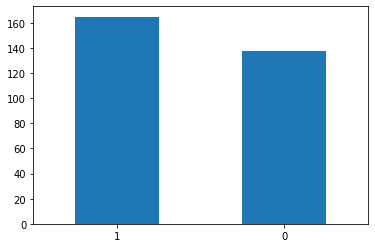

In [35]:
bar=data["target"].value_counts()
bar.plot.bar(rot=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

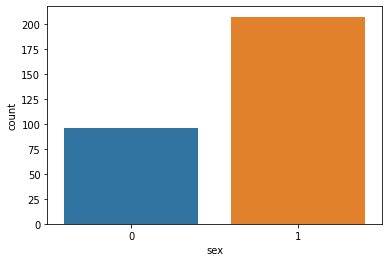

In [36]:
sb.countplot(x='sex',data=data)
plt.xticks()

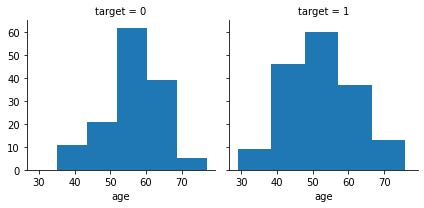

In [37]:
g=sb.FacetGrid(data,col='target')

g.map(plt.hist,'age',bins=5)


LOGISTIC REGRESSION

In [38]:
x=data[["sex","oldpeak","exang","ca","cp"]]
y=data["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.5f}".format(logreg.score(x_test, y_test)))

Accuracy=0.85981


In [8]:
confusion_matrix= pd.crosstab(y_test,y_pred, rownames=['actual'],colnames=['predicted'])
print(confusion_matrix)

predicted   0   1
actual           
0          42   8
1           7  50


In [9]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85        50
           1       0.86      0.88      0.87        57

    accuracy                           0.86       107
   macro avg       0.86      0.86      0.86       107
weighted avg       0.86      0.86      0.86       107



KNN

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1984) 

In [28]:
n_neighbors=10
scores=[]
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.79
Accuracy for k= 2 is: 0.82
Accuracy for k= 3 is: 0.82
Accuracy for k= 4 is: 0.82
Accuracy for k= 5 is: 0.85
Accuracy for k= 6 is: 0.79
Accuracy for k= 7 is: 0.82
Accuracy for k= 8 is: 0.72
Accuracy for k= 9 is: 0.75


Text(0, 0.5, 'Testing Accuracy')

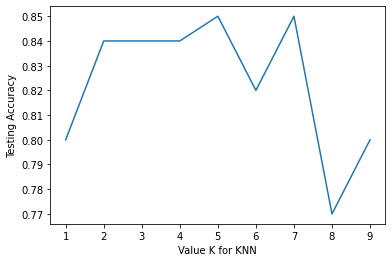

In [12]:
plt.plot(range(1,10),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

Decision Tree

In [14]:
#applying tree algorithm
tr = tree.DecisionTreeClassifier()  
tr.fit(x_train, y_train) 

#fitting our model
y_pred=tr.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7540983606557377


In [55]:
heart = [i for i in x_train.columns]
y_train_str = y_train.astype('str')
y_train_str[y_train_str=='0']='Less Chance'
y_train_str[y_train_str=='1']='High Chance'
y_train_str = y_train_str.values


In [60]:
import graphviz
dot_data= tree.export_graphviz(tr, out_file=None,feature_names = heart, class_names= y_train_str) 
graph= graphviz.Source(dot_data)


In [63]:

graph.render("heart_tree",view=True)

'heart_tree.pdf'

In [19]:
def importdata():
    df = pd.read_csv("D:\Mini Projects\Heart Attack Data Analysis\heart.csv")
    
def splitdataset(df):
    x=data[["sex","oldpeak","exang","ca","cp"]]
    y=data["target"]

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
    return x, y, x_train, x_test, y_train, y_test

In [20]:
def train_using_gini(X_train, X_test, y_train):
      
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [21]:
def tarin_using_entropy(X_train, X_test, y_train):
      
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [25]:
def prediction(X_test, clf_object):
      
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [22]:
def cal_accuracy(y_test, y_pred):
      
    #print("Confusion Matrix: ",
        #confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [26]:
def main():
      
    # Building Phase
    data = importdata()
    x, y, x_train, x_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(x_train, x_test, y_train)
    clf_entropy = tarin_using_entropy(x_train, x_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(x_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(x_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0]
Accuracy :  80.37383177570094
Report :                precision    recall  f1-score   support

           0       0.81      0.76      0.78        50
           1       0.80      0.84      0.82        57

    accuracy                           0.80       107
   macro avg       0.80      0.80      0.80       107
weighted avg       0.80      0.80      0.80       107

Results Using Entropy:
Predicted values:
[1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0]
Accuracy :  80.37383177570094
Report :                precision    recall  f1-score   support

           0     